In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_detections = pickle.load(f)

In [7]:
ball_detections = [x.get(1, []) for x in ball_detections]
df_ball_positions = pd.DataFrame(ball_detections, columns=['x1', 'y1', 'x2', 'y2'])

df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [9]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window = 5, min_periods = 1, center = False).mean()

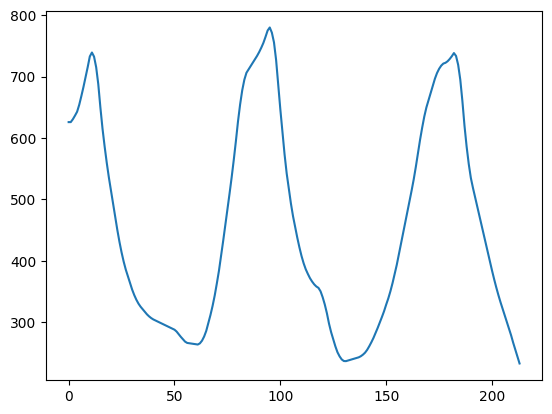

In [11]:
plt.plot(df_ball_positions['mid_y_rolling_mean'], label='mid_y')

In [12]:
df_ball_positions['dela_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

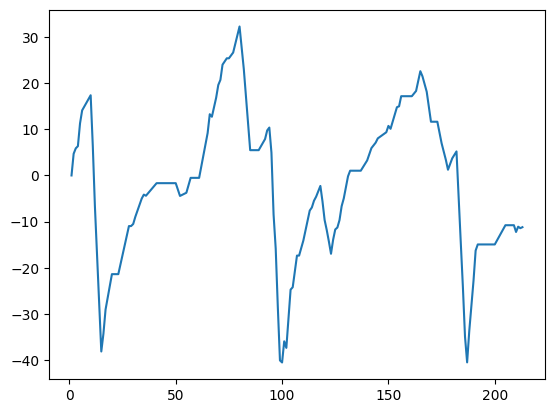

In [13]:
plt.plot(df_ball_positions['dela_y'], label='dela_y')

In [38]:
df_ball_positions['ball_hit'] = 0

In [65]:
minimum_change_frames = 20

for i in range(1, len(df_ball_positions) - int(*i)):
    negative_change = df_ball_positions['dela_y'].iloc[i] > 0 and df_ball_positions['dela_y'].iloc[i + 1].min()
    positive_change = df_ball_positions['dela_y'].iloc[i] < 0 and df_ball_positions['dela_y'].iloc[i + 1].max()
    
    if positive_change or negative_change:
        change = 0

        for change in range(i + 1, i + minimum_change_frames + 1):
            negative_change_next_frame = df_ball_positions['dela_y'].iloc[change] > 0 and df_ball_positions['dela_y'].iloc[change] < 0
            positive_change_next_frame = df_ball_positions['dela_y'].iloc[change] < 0 and df_ball_positions['dela_y'].iloc[change] > 0
    
            if negative_change and negative_change_next_frame:
                change += 1
            elif positive_change and positive_change_next_frame:
                change += 1

        if change > minimum_change_frames - 1:
            df_ball_positions['ball_hit'].iloc[i] = 1

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2881943836.py, line 3)

In [57]:
print(df_ball_positions['ball_hit'].sum())

193
